In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

# Extract Summary

In [4]:
def extract_summary(file_path="data_input/data.csv", id=['936','1178']):
  """   
  Extract all relevant information, containing 6 variables
  start_date, end_date, total_spent, total_conversion, cpc_1, cpc_2
  """
  fb = pd.read_csv(file_path)
  campaigns = fb[fb['campaign_id'].isin(id)]
  campaigns = campaigns[campaigns.spent > 0]

  # Make sure to passed in appropriate preprocessing before extracting the start and end date
  campaigns['reporting_start'] = pd.to_datetime(campaigns['reporting_start'])
  start_date = campaigns['reporting_start'].min().strftime(format="%d %b %Y")
  end_date = campaigns['reporting_start'].max().strftime(format="%d %b %Y")

  total_spent = int(campaigns['spent'].sum())
  total_conversion = int(campaigns['total_conversion'].sum())


  # Create a cost per conversion dictionary per campaign
  # Cost per conversion is spent divided by total conversion
  cpc = campaigns.groupby(['campaign_id'])[['spent', 'total_conversion']].sum()
  cpc['CPC'] = cpc['spent']/cpc['total_conversion'] #spent/conversion
  cpc_each = dict()

  for each in id:
      cpc_each[each] = round(float(cpc[cpc.index == each]['CPC']), 2)


  return {
    "start_date": start_date,
    "end_date": end_date,
    "total_spent": total_spent,
    "total_conversion": total_conversion,
    "cpc": cpc_each}

In [5]:
extract_summary()

{'start_date': '18 Aug 2017',
 'end_date': '30 Aug 2017',
 'total_spent': 19470,
 'total_conversion': 1398,
 'cpc': {'936': 8.13, '1178': 15.91}}

In [6]:
file_path="data_input/data.csv"
id=['936','1178']


fb = pd.read_csv(file_path)
campaigns = fb[fb['campaign_id'].isin(id)]
campaigns = campaigns[campaigns.spent > 0]

In [7]:
campaigns.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
55,734210,25/08/2017,25/08/2017,936,108654,30-34,M,10,16,13,13329.0,4,5.63,1.0,1.0
56,734215,26/08/2017,26/08/2017,936,108655,30-34,M,15,19,17,13659.0,3,3.84,1.0,0.0
60,734290,26/08/2017,26/08/2017,936,108668,30-34,M,29,32,35,5374.0,1,1.04,4.0,0.0
63,734352,27/08/2017,27/08/2017,936,108678,35-39,M,10,11,16,4423.0,1,1.46,1.0,1.0
64,734361,29/08/2017,29/08/2017,936,108680,35-39,M,16,19,19,12382.0,2,2.84,1.0,1.0


In [7]:
# Make sure to passed in appropriate preprocessing before extracting the start and end date
campaigns['reporting_start'] = pd.to_datetime(campaigns['reporting_start'])
start_date = campaigns['reporting_start'].min().strftime(format="%d %b %Y")
end_date = campaigns['reporting_start'].max().strftime(format="%d %b %Y")

total_spent = int(campaigns['spent'].sum())
total_conversion = int(campaigns['total_conversion'].sum())

----

In [8]:
campaigns.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
55,734210,2017-08-25,25/08/2017,936,108654,30-34,M,10,16,13,13329.0,4,5.63,1.0,1.0
56,734215,2017-08-26,26/08/2017,936,108655,30-34,M,15,19,17,13659.0,3,3.84,1.0,0.0
60,734290,2017-08-26,26/08/2017,936,108668,30-34,M,29,32,35,5374.0,1,1.04,4.0,0.0
63,734352,2017-08-27,27/08/2017,936,108678,35-39,M,10,11,16,4423.0,1,1.46,1.0,1.0
64,734361,2017-08-29,29/08/2017,936,108680,35-39,M,16,19,19,12382.0,2,2.84,1.0,1.0


In [9]:
cpc = campaigns.groupby(['campaign_id'])[['spent', 'total_conversion']].sum()
cpc['CPC'] = cpc['spent']/cpc['total_conversion'] #spent/conversion
cpc_each = dict()

for each in id:
    cpc_each[each] = round(float(cpc[cpc.index == each]['CPC']), 2)

----

# Create Plot

In [10]:
def create_plot(file_path="data_input/data.csv", id=['936', '1178']):
  """   
  Fetch data from data source and export as plot
  """
  fb = pd.read_csv(file_path, parse_dates=[1,2])
  campaigns = fb[fb['campaign_id'].isin(id)]
  campaigns = campaigns[campaigns.spent > 0]

  # Create a grouped dataframe based on campaign id, age group, and reporting date
  # Calculate the total converision of each group
  grouped = campaigns.groupby(
    by=['campaign_id', 'age', 'reporting_start'], as_index=False) ['total_conversion'].sum()

  fig = plt.figure(1, figsize=(15,6))

  # Iterate to create 1 plot campaign at a time
  for i, campaign in enumerate(grouped.campaign_id.unique()):
    plt.subplot(1, len(id), i+1)
    
    df = grouped[grouped['campaign_id'] == campaign].loc[:,['age', 'reporting_start', 'total_conversion']]
    df['reporting_start'] = df['reporting_start'].dt.date
    pivot = df.pivot(index='reporting_start', columns='age', values='total_conversion').fillna(0)
    pivot.plot.bar(ax=plt.gca())


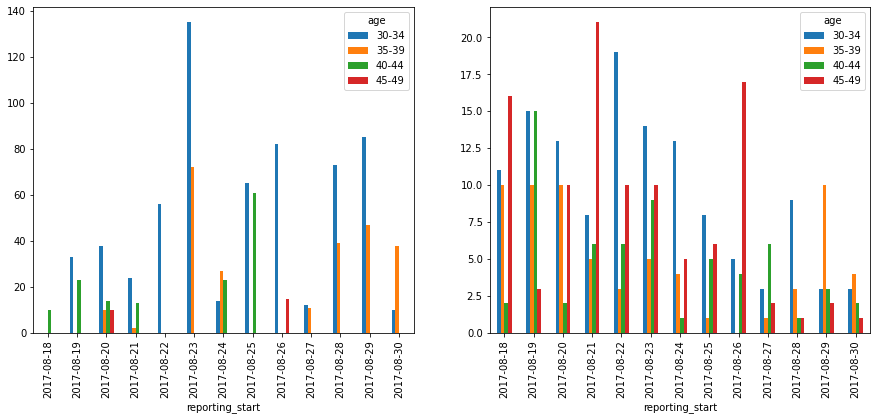

In [11]:
create_plot()

In [12]:

grouped = campaigns.groupby(
        by=['campaign_id', 'age', 'reporting_start'], as_index=False)['total_conversion'].sum()

grouped


,campaign_id,age,reporting_start,total_conversion
0,1178,30-34,2017-08-19,33.0
1,1178,30-34,2017-08-20,38.0
2,1178,30-34,2017-08-21,24.0
3,1178,30-34,2017-08-22,56.0
4,1178,30-34,2017-08-23,135.0
...,...,...,...,...
74,936,45-49,2017-08-26,17.0
75,936,45-49,2017-08-27,2.0
76,936,45-49,2017-08-28,1.0
77,936,45-49,2017-08-29,2.0


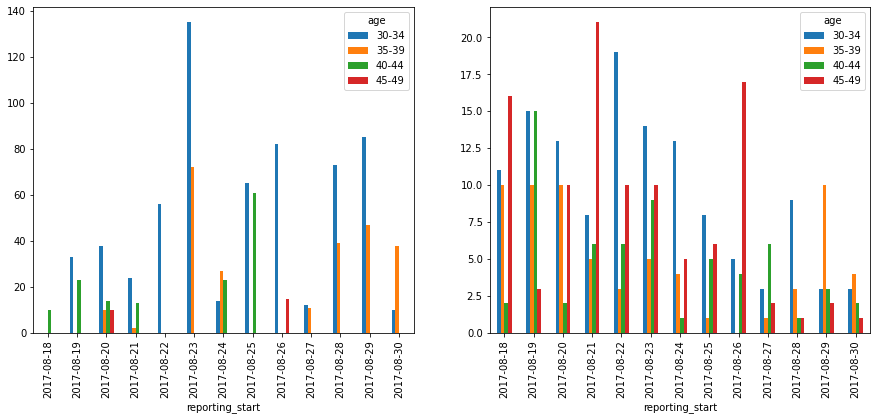

In [13]:
fig = plt.figure(1, figsize=(15, 6))

for i, campaign in enumerate(grouped.campaign_id.unique()):
        plt.subplot(1, len(id), i+1)

        df = grouped[grouped['campaign_id'] == campaign].loc[:, [
            'age', 'reporting_start', 'total_conversion']]
        df['reporting_start'] = pd.to_datetime(
            df['reporting_start'], dayfirst=True).dt.date
        pivot = df.pivot(index='reporting_start', columns='age',
                         values='total_conversion').fillna(0)
        pivot.plot.bar(ax=plt.gca())

___

In [2]:
import os
import smtplib

EMAIL = os.environ['EMAIL_ADDRESS']
PASSWORD = os.environ['EMAIL_PASSWORD']

s = smtplib.SMTP("smtp.gmail.com",587)
s.starttls() #Puts connection to SMTP server in TLS mode
s.login(EMAIL, PASSWORD)

msg = "\nsent with python for testing purpose"
s.sendmail(from_addr=EMAIL,to_addrs=["rahardian.luthfan@gmail.com"], msg=msg)
 



{}